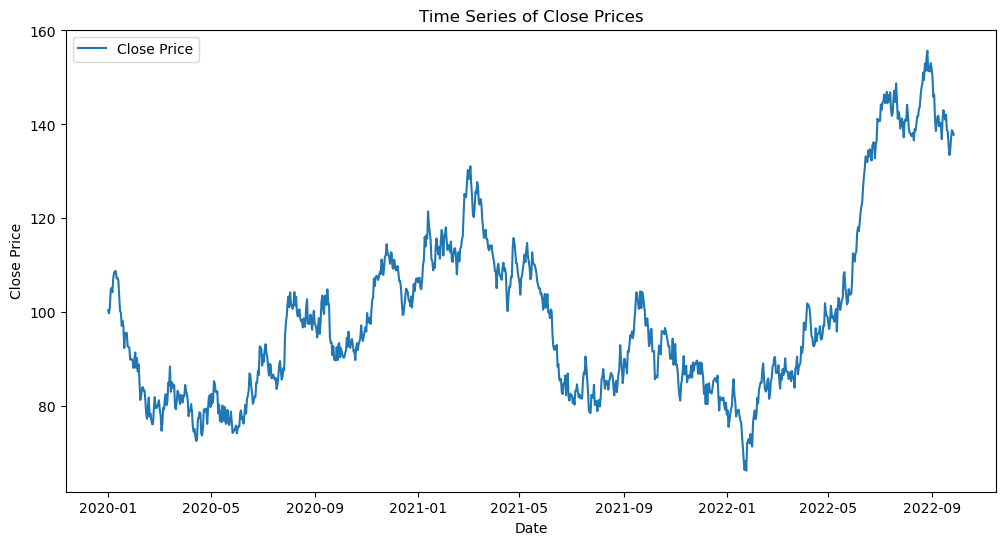

C:\Users\Shaarukesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shaarukesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Shaarukesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


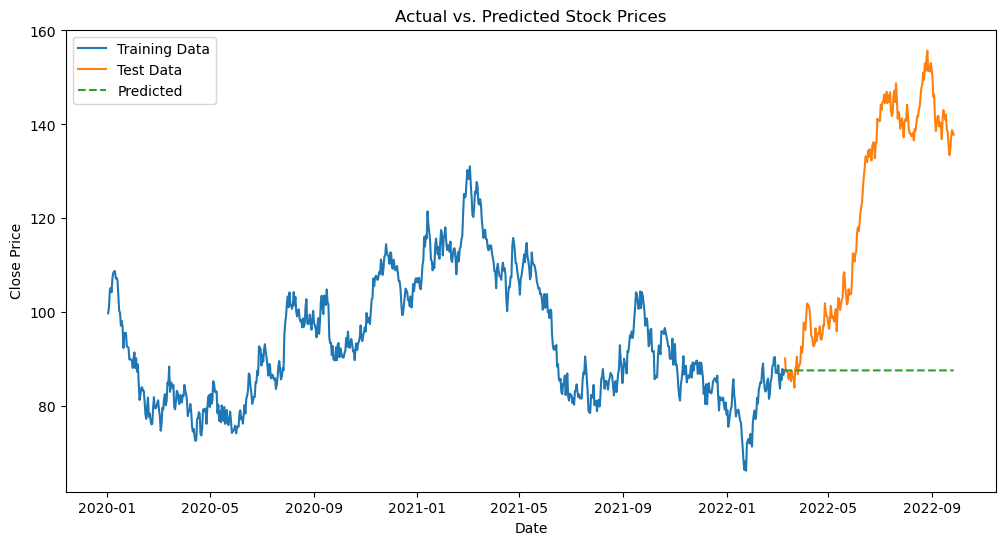

Mean Squared Error (MSE): 1678.0659668420512
Root Mean Squared Error (RMSE): 40.96420348111325
Mean Absolute Error (MAE): 34.40454900778354
Mean Absolute Percentage Error (MAPE): 25.586119957230398%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Load dataset
df = pd.read_csv('Stock_Prices.csv')

# Convert Date column to DateTime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing values
df.dropna(inplace=True)

# Set Date as the index for time-series analysis
df.set_index('Date', inplace=True)

# Plot time series of Close prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Create lag features (previous day's close price)
df['Previous_Close'] = df['Close'].shift(1)

df.dropna(inplace=True)  # Drop first row due to lag feature

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train ARIMA model
model = ARIMA(train['Close'], order=(5,1,0))  # Example order, tune as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Compare actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Training Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.plot(test.index, forecast, label='Predicted', linestyle='dashed')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(forecast - test['Close']))
mape = np.mean(np.abs(forecast - test['Close']) / np.abs(test['Close'])) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')